<a href="https://colab.research.google.com/github/gferew1/IntroML/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [308]:
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [309]:
drive.mount ('/content/drive')
file_path ='/content/drive/My Drive/Colab Notebooks/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [310]:
#mapping variables
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

#map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})


housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [311]:
from sklearn.model_selection import train_test_split

num_varsa = num_varsa = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [312]:
# get input values from first column
X_train = df_train[num_varsa].values[:, (0,1,2,3,4)]  # get input values from first column

# get input values from second column
y_train = df_train[num_varsa].values[:, 5]


# Number of training examples
Z_train = len(y_train)

# Number of training examples
G_train = len(X_train)


# showing the first 5 records and the total number of training examples
print('X = ', X_train[: 5])
print('y = ', y_train[: 5])
print('Z = ', Z_train)
print('G = ', G_train)






X =  [[8050    3    1    1    1]
 [6360    3    2    4    0]
 [6750    2    1    1    2]
 [6420    3    1    1    0]
 [3630    4    1    2    3]]
y =  [8645000 7840000 6419000 5950000 3010000]
Z =  436
G =  436


In [313]:
# Separate features and labels
X_test = df_test[num_varsa].values[:, (0,1,2,3,4)]  # get input values from first column -- X is a list here
y_test = df_test[num_varsa].values[:, 5]  # get output values from second column -- Y is the list here
Z_test = len(y_test)  # Number of training examples
G_test = len(X_test)  # Number of training examples


# Display first 5 records and the total number of training examples
print('X = ', X_test[: 5])
print('y = ', y_test[: 5])
print('Z = ', Z_test)
print('G = ', G_test)

X =  [[ 2880     3     1     2     0]
 [ 6000     3     2     2     1]
 [10269     3     1     1     1]
 [ 5320     3     1     2     0]
 [ 4950     4     1     2     0]]
y =  [4403000 7350000 5250000 4550000 4382000]
Z =  109
G =  109


In [314]:
X_0train = np.ones((m_train, 1))
X_0train[:5]

X_0test = np.ones((m_test, 1))
X_0test[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [315]:
X_1train = X_train.reshape(m_train, 5)
X_1train[:10]



array([[8050,    3,    1,    1,    1],
       [6360,    3,    2,    4,    0],
       [6750,    2,    1,    1,    2],
       [6420,    3,    1,    1,    0],
       [3630,    4,    1,    2,    3],
       [3850,    2,    1,    1,    0],
       [8960,    4,    4,    4,    3],
       [8250,    3,    1,    1,    0],
       [3000,    3,    2,    2,    0],
       [4032,    2,    1,    1,    0]])

In [316]:
X_1test = X_test.reshape(m_test, 5)
X_1test[:10]

array([[ 2880,     3,     1,     2,     0],
       [ 6000,     3,     2,     2,     1],
       [10269,     3,     1,     1,     1],
       [ 5320,     3,     1,     2,     0],
       [ 4950,     4,     1,     2,     0],
       [ 4320,     3,     1,     1,     0],
       [ 6540,     4,     2,     2,     2],
       [ 6540,     4,     2,     2,     0],
       [ 6800,     2,     1,     1,     0],
       [ 6540,     3,     1,     1,     2]])

In [317]:
Xtrain = np.hstack((X_0train, X_1train))
Xtrain[:5]



array([[1.00e+00, 8.05e+03, 3.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 6.36e+03, 3.00e+00, 2.00e+00, 4.00e+00, 0.00e+00],
       [1.00e+00, 6.75e+03, 2.00e+00, 1.00e+00, 1.00e+00, 2.00e+00],
       [1.00e+00, 6.42e+03, 3.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 3.63e+03, 4.00e+00, 1.00e+00, 2.00e+00, 3.00e+00]])

In [318]:
Xtest = np.hstack((X_0test, X_1test))
Xtest[:5]

array([[1.0000e+00, 2.8800e+03, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00],
       [1.0000e+00, 6.0000e+03, 3.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00],
       [1.0000e+00, 1.0269e+04, 3.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 5.3200e+03, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00],
       [1.0000e+00, 4.9500e+03, 4.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00]])

In [319]:
#set theta value
theta = np.zeros(6)
v = len(housing)
print(v)

545


In [320]:
def compute_cost_train(X, y, theta):

    predictions = X.dot(theta)

    errors = np.subtract(predictions, y)
    SquareError = np.square(error)

    J = 1 / (2 * m) * np.sum(SquareError)

    return J

In [321]:
def gradient_descent(X, Xtest, y, y_test, theta, alpha, iterations):
    m_train = len(y)  # Number of training examples
    m_test = len(y_test)  # Number of testing examples
    cost_history_train = np.zeros(iterations)
    cost_history_test = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        gradients = (2/m_train) * X.transpose().dot(errors)
        theta -= alpha * gradients

        train_loss = (1/m_train) * np.sum(np.square(X.dot(theta) - y))
        cost_history_train[i] = train_loss

        val_loss = (1/m_test) * np.sum(np.square(Xtest.dot(theta) - y_test))
        cost_history_test[i] = val_loss

    return theta, cost_history_train, cost_history_test



In [322]:
def gradient_descent(X, Xtest, y, y_test, theta, alpha, iterations):
    m_train = len(y)  # Number of training examples
    m_test = len(y_test)  # Number of testing examples
    cost_history_train = np.zeros(iterations)
    cost_history_test = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        gradients = (2/m_train) * X.transpose().dot(errors)
        theta -= alpha * gradients

        train_loss = (1/m_train) * np.sum(np.square(X.dot(theta) - y))
        cost_history_train[i] = train_loss

        val_loss = (1/m_test) * np.sum(np.square(Xtest.dot(theta) - y_test))
        cost_history_test[i] = val_loss

    return theta, cost_history_train, cost_history_test


In [323]:
iterations = 3500
alpha =  0.0000000001

In [324]:
theta, cost_history_train, cost_history_test = gradient_descent(Xtrain, Xtest, y_train, y_test, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history_train, cost_history_test)

Final value of theta = [3.95270481e-01 8.61913518e+02 1.37906928e+00 7.46821731e-01
 1.11943056e+00 3.19155101e-01]
cost_history = [2.61912449e+13 2.59084402e+13 2.56291415e+13 ... 3.38021243e+12
 3.38021243e+12 3.38021242e+12] [2.48764401e+13 2.45976801e+13 2.43224398e+13 ... 3.21894240e+12
 3.21894240e+12 3.21894240e+12]


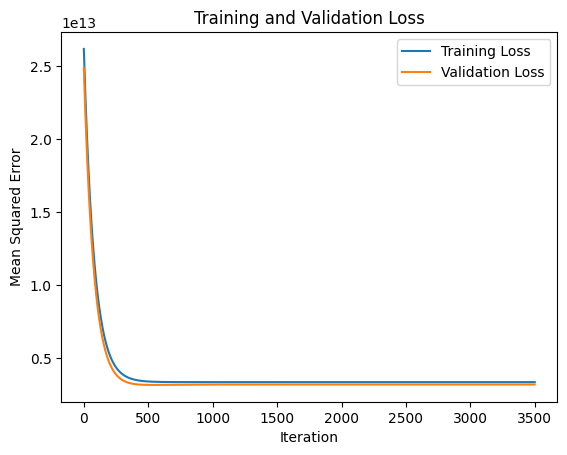

In [325]:
plt.plot(cost_history_train, label="Training Loss")
plt.plot(cost_history_test, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

In [326]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking','prefarea','price']

X_train2 = df_train[num_vars].values[:, 0:11]
y_train2 = df_train[num_vars].values[:, 11]
G_train2 = len(y_train2)
Z_train2 = len(X_train2)



print('X = ', X_train2[: 5])


X =  [[8050    3    1    1    1    1    1    0    1    1    0]
 [6360    3    2    4    1    0    0    0    1    0    1]
 [6750    2    1    1    1    1    1    0    0    2    1]
 [6420    3    1    1    1    0    1    0    1    0    1]
 [3630    4    1    2    1    0    0    0    0    3    0]]


In [327]:
print('y = ', y_train2[: 5])

y =  [8645000 7840000 6419000 5950000 3010000]


In [328]:
print('G = ', G_train2)

G =  436


In [329]:
print('Z = ', Z_train2)

Z =  436
